In [1]:
import fitz
import io
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt

# READ FILE

In [ ]:
# file path you want to extract images from
file = "Lampiran Sertifikasi ASP KA Pupuk Cp-Ce.pdf"
 
# open the file
pdf_file = fitz.open(file)
 


# EXTRACT INFORMATION

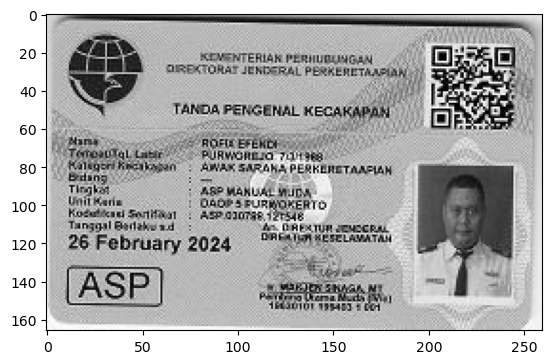

In [236]:
#img=cv2.imread("ktp isty 1.jpg")
img=cv2.imread("image66.jpeg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

# ADJUSTING THRESHOLD


In [243]:
th,thresh=cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
th3 = cv2.adaptiveThreshold(gray,100,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#th,thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


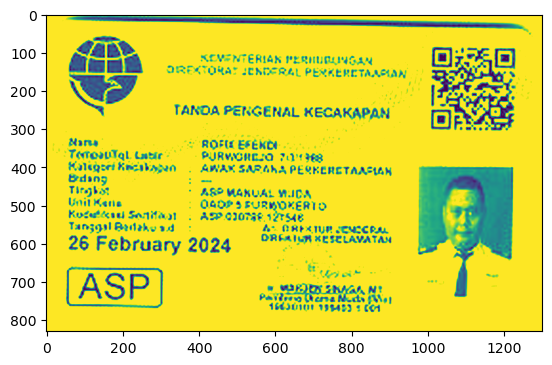

In [244]:
plt.imshow(thresh)

# READ THE CARD


In [245]:

result=pytesseract.image_to_string(thresh, lang='ind')

In [246]:
result.split("\n")

['/ TNS',
 'a',
 '',
 '. . NIOVSNTERIAN PERUHURLIGAN',
 'DREKTORAT JENDERAL PEMAERETANYAN',
 '',
 'x TANDA PEKRGENAL KECAKAPAN',
 '',
 'Marua - ROFU ESEKU',
 '',
 'TOTOrUYAaL Lugir PURWWO HEG 70111368',
 '',
 'Kalegrei KeEIbanO . AWAN SARAKA PEGKERETAAAN',
 '',
 'Bdang i —',
 '',
 'Tira)ba3i “ ARP MANUAL MUCA',
 '',
 'UnitKene O4OP 3 FURMUKERTO',
 '',
 'Kozut ae SANHAI . AS O)OT5E 1 2TUE',
 '',
 'Tanggri Radahuad - A OREATUR JENMEGRAL',
 '',
 '26 February 2024 OREAIUR KESELAYATAN',
 '',
 'I PEPe Rad',
 'A " ”V-% 5 AN!',
 'KA %: JAl',
 '16GINNNUN 13B45) S CCA',
 '',
 '']

In [247]:

result=pytesseract.image_to_string(thresh, lang='ind')

In [220]:
result.split("\n")

['. l KEMENTERIAN PERHUBUNGAN',
 'DIREKTORAT JENDERAL PERKERETAAPIAN',
 '',
 "x', TANDA PENGENAL KECA(APAN",
 '',
 'Nama DAVIT MARDIYANTO',
 'TempatiTgi.Lahir KEBUMEN, 14 Juni 1991',
 'Kategori Kecakapan . AWAK SARANA PERKERETAAPIAN',
 '',
 'Bidang KERETA API MANUAL',
 'Tingkat MUDA',
 'Unit Kerja : DAOP 5 PURWOKERTO',
 '',
 'Tanggal Berlaku 5.d. : 214 Desember 2022',
 '',
 'Kodifikasi Sertfikat - ASP.140891.02138 41 OAEA SA',
 '',
 '(MN —',
 '& M',
 'Pembina Utama Madya IVIG)',
 '',
 'NP 196212121983031012',
 '',
 '']

In [215]:
#aa=[]
for word in result.split("\n"):
       print(word)

. KEMENTERIAN PERHUBUNGAN
DIREKTORAT JENDERAL PERKERETAAPIAN

xl, TANDA PENGENAL KECA(APAN

Nama DAVIT MARDIYANTO
TempatTgiLahir — . KEBUMEN, 14 Juni 1991
Kategori Kecakapan : AWAK SARANA PERKERETAAPIAN

Bidang KERETA API MANUAL
Tingkat MUDA
Unit Kerja DAOP $ PURWOKERTO

Tanggal Berlaku 5.4. : 21 Desember 2022
Kodifikasi Serifikat " ASP 140891 0213847 Oeee Siora.
WA

III -

N ar 21aeRpG2




# EXTRACT INFORMATION PARAMETERS: cv2.threshold(gray,120,200,cv2.THRESH_TRUNC)

In [125]:
aa=[]

In [126]:
for i in range(1,97):
    try:
        file=f"image{i}.jpeg"
        img=cv2.imread(file)
        img= cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        th,thresh=cv2.threshold(gray,120,200,cv2.THRESH_TRUNC)
        result=pytesseract.image_to_string(thresh, lang='ind')
        aa.append(result.split("\n"))
    except: 
        pass
    


aa

In [127]:
coba=[]
for i in range (len(aa)):
    coba.append([list(filter(lambda x: "Nam" in x, aa[i])),
       list(filter(lambda x: "Tem" in x, aa[i])),
       list(filter(lambda x: "Uni" in x, aa[i])),
       list(filter(lambda x: "Tang" in x, aa[i])),
       list(filter(lambda x: "Kod" in x, aa[i]))])


#[i for i in aa[1] if ["Nam" or 'Tem' or 'Tangg' or "Kod" in i]

In [128]:
#Delete 'Nama' in Nama Information
for i in range(len(coba)):
    if len(coba[i][0])==0:
            coba[i][0]=""
    else:
        try:
            for word in ["Nama",":"]:
                coba[i][0][0]= (coba[i][0][0]).replace(word,"")
            coba[i][0]=coba[i][0][0]
        except:
            pass

In [129]:
ttl=[]
word_split=[]
for i in range(len(coba)):
    for word in (coba[i][1]):
        word_split.append((word.split(" ")))
        if len(word.split(" "))<5:
            ttl.append(word.split(" ")[-2:])
            coba[i][1]=' '.join(map(str,(word.split(" ")[-2:])))
        else:
            ttl.append(word.split(" ")[-5:])
            coba[i][1]=' '.join(map(str,(word.split(" ")[-5:])))
    if len(coba[i][1])==0:
            coba[i][1]=""
    
delete_ttl=[]
for i in range(len(ttl)):
    if (ttl[i][0]).startswith("Temp") or (ttl[i][0]).startswith("Lahi"):
        delete_ttl.append(ttl[i][0])
delete_ttl.append('—')
delete_ttl.append(':')
    

In [130]:
for i in range(len(coba)):
    try: 
        for word in delete_ttl:
            coba[i][1]=coba[i][1].replace(word,"")
    except:
        pass

In [131]:
#coba[3][2]=[coba[3][2][1]]

In [132]:
unker=[]
for i in range(len(coba)):
    if len(coba[i][2])==0:
            unker.append([])
    else:
        for word in (coba[i][2]):
            unker.append((word.split(" ")))


In [133]:
for i in range(len(unker)):
    print(i," ", unker[i])

0   ['Unit', 'Keria', ':', 'DAOP', 'VPURWOKERTO']
1   ['Unit', 'Keria', ':', 'DAOP', 'VPURWOKERTO']
2   ['Unit', 'Keria', ':', 'DAOP', '#', 'BANDUNG']
3   ['Unit', 'Keria']
4   ['Unit', 'Keria']
5   ['Unit', 'Kerja', ':', 'DAOP', '5', 'PURWOKERTO']
6   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO', '|']
7   ['Unit', 'Kerja', ':', 'DAOP', '5', 'PURWOKERTO']
8   ['Unit', 'Keria', ':', 'DAOP', 'VPURWOKERTO']
9   ['Unit', 'Keria', ':', 'DAOP', 'VPURWOKERTO']
10   ['Unit', 'Keria']
11   ['Unit', 'Keria', 'DAOP', 'V', 'PURWOKERTO']
12   ['Unit', 'Kenia', ':', 'DAOP', '5', 'PURWOKERTO']
13   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO']
14   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO']
15   ['Unit', 'Keria', ':', 'DAOP', 'VPURWOKERTO']
16   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO']
17   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO']
18   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO', '.']
19   ['Unit', 'Kerja']
20   ['Unit', 'Keria', ':', 'DAOP', 'V', 'PURWOKERTO']
2

In [134]:
delete_unker=[]                     
for i in range(len(unker)):
    if len(unker)==0:
        coba[i][2]=""
    else:
        var=[x for x in unker[i] if not (x.startswith("Un") or x.startswith("Kar") or x.startswith("Ke") or x.startswith("Kor"))]  
        coba[i][2]=' '.join(map(str,var))


In [135]:
hingga=[]
for i in range(len(coba)):
    if len(coba[i][3])==0:
        coba[i][3]=""
    else:
        for word in (coba[i][3]):
            var=(word.split(" "))[-3:]
            var=[x for x in var if not (x.startswith("Tang") or x.startswith("Ber") or x.startswith("s.") or
                                       x.startswith("Oa") or x.startswith("c") or x.startswith("Bae"))]
            coba[i][3]=' '.join(map(str,var))

In [136]:
for i in range(len(coba)):        
    if len(coba[i][4])==0:
            coba[i][4]=""
    else:
        for word in (coba[i][4]):
             coba[i][4]=' '.join(map(str,([x for x in (word.split(" ")) if not (x.startswith("Kod") or x.startswith("S")
                                                   or x.startswith("—") or x.startswith(":") or x.startswith(".")
                                                   or x.startswith("-") or x.startswith('“') or x.startswith("'"))])))

In [137]:
for i in range(len(coba)):        
        print(i,coba[i])

0 ['  - AMIN SURYADI', ' Lahis  BANYUMAS. 12/28/1978', ': DAOP VPURWOKERTO', '13 October 2025', 'ASP.28121978. 31468']
1 ['  BUDIRIYANTO', '   BANYUMAS. 4/22/1975', ': DAOP VPURWOKERTO', '17 June 2025', 'AS”.22041975.29747']
2 ['  AGUS RIYANTO', '   CILACAP. 8/17/1973', ': DAOP # BANDUNG', '19 March 2025', 'ASP.170873.127487']
3 ['', ' ', '', '', '']
4 ['', ' ', '', '', '']
5 [' AFIT TOFAN!', '- CILACAP, 19 Agustus 1987', ': DAOP 5 PURWOKERTO', '01 Nopember 2022', 'ASP.190887 03399 Ar DIREKTUR Z NDERAL']
6 ['  ABDUL RAHMAN SIDIK', '.   CILACAP. 9/17/1987', ': DAOP V PURWOKERTO |', '13 October 2025', 'ASP.170987.02918']
7 [' AMIR MUSTOFA', ' BANYUMAS, 28 Mei 1989', ': DAOP 5 PURWOKERTO', '21 Desember 2022', 'ASP.280589.03982/9']
8 ['  ADI KHRISTIANTO', '   CILACAP. 4/22/1985', ': DAOP VPURWOKERTO', '05 April 2026', 'ASP.220485.03350']
9 ['  ARIF SAYUTI', '   CILACAP. 9/29/1987', ': DAOP VPURWOKERTO', '25 October 2025', 'ASP.29091987.31448']
10 ['', ' ', '', '', '']
11 ['  DWI SUSILO', '

# EXTRACT INFORMATION PARAMETERS: cv2.threshold(gray,100,200,cv2.THRESH_TRUNC)

In [125]:
aa2=[]

In [ ]:
for i in range(1,97):
    try:
        file=f"image{i}.jpeg"
        img=cv2.imread(file)
        img= cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        th,thresh=cv2.threshold(gray,100,200,cv2.THRESH_TRUNC)
        result=pytesseract.image_to_string(thresh, lang='ind')
        aa2.append(result.split("\n"))
    except: 
        pass
    


aa2

In [ ]:
coba2=[]
for i in range (len(aa2)):
    coba2.append([list(filter(lambda x: "Nam" in x, aa2[i])),
       list(filter(lambda x: "Tem" in x, aa2[i])),
       list(filter(lambda x: "Uni" in x, aa2[i])),
       list(filter(lambda x: "Tang" in x, aa2[i])),
       list(filter(lambda x: "Kod" in x, aa2[i]))])


#[i for i in aa2[1] if ["Nam" or 'Tem' or 'Tangg' or "Kod" in i]

In [ ]:
#Delete 'Nama' in Nama Information
for i in range(len(coba2)):
    if len(coba2[i][0])==0:
            coba2[i][0]=""
    else:
        try:
            for word in ["Nama",":"]:
                coba2[i][0][0]= (coba2[i][0][0]).replace(word,"")
            coba2[i][0]=coba2[i][0][0]
        except:
            pass

In [ ]:
ttl=[]
word_split=[]
for i in range(len(coba2)):
    for word in (coba2[i][1]):
        word_split.append((word.split(" ")))
        if len(word.split(" "))<5:
            ttl.append(word.split(" ")[-2:])
            coba2[i][1]=' '.join(map(str,(word.split(" ")[-2:])))
        else:
            ttl.append(word.split(" ")[-5:])
            coba2[i][1]=' '.join(map(str,(word.split(" ")[-5:])))
    if len(coba2[i][1])==0:
            coba2[i][1]=""
    
delete_ttl=[]
for i in range(len(ttl)):
    if (ttl[i][0]).startswith("Temp") or (ttl[i][0]).startswith("Lahi"):
        delete_ttl.append(ttl[i][0])
delete_ttl.append('—')
delete_ttl.append(':')
    

In [ ]:
for i in range(len(coba2)):
    try: 
        for word in delete_ttl:
            coba2[i][1]=coba2[i][1].replace(word,"")
    except:
        pass

In [ ]:
#coba2[3][2]=[coba2[3][2][1]]

In [ ]:
unker=[]
for i in range(len(coba2)):
    if len(coba2[i][2])==0:
            unker.append([])
    else:
        for word in (coba2[i][2]):
            unker.append((word.split(" ")))


In [ ]:
for i in range(len(unker)):
    print(i," ", unker[i])

In [ ]:
delete_unker=[]                     
for i in range(len(unker)):
    if len(unker)==0:
        coba2[i][2]=""
    else:
        var=[x for x in unker[i] if not (x.startswith("Un") or x.startswith("Kar") or x.startswith("Ke") or x.startswith("Kor"))]  
        coba2[i][2]=' '.join(map(str,var))


In [ ]:
hingga=[]
for i in range(len(coba2)):
    if len(coba2[i][3])==0:
        coba2[i][3]=""
    else:
        for word in (coba2[i][3]):
            var=(word.split(" "))[-3:]
            var=[x for x in var if not (x.startswith("Tang") or x.startswith("Ber") or x.startswith("s.") or
                                       x.startswith("Oa") or x.startswith("c") or x.startswith("Bae"))]
            coba2[i][3]=' '.join(map(str,var))

In [ ]:
for i in range(len(coba2)):        
    if len(coba2[i][4])==0:
            coba2[i][4]=""
    else:
        for word in (coba2[i][4]):
             coba2[i][4]=' '.join(map(str,([x for x in (word.split(" ")) if not (x.startswith("Kod") or x.startswith("S")
                                                   or x.startswith("—") or x.startswith(":") or x.startswith(".")
                                                   or x.startswith("-") or x.startswith('“') or x.startswith("'"))])))

In [ ]:
for i in range(len(coba2)):        
        print(i,coba2[i])

# EXTRACT INFORMATION PARAMETERS: cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)

In [54]:
cc=[]

In [55]:
for i in range(1,97):
    try:
        file=f"image{i}.jpeg"
        img=cv2.imread(file)
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        th,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        result=pytesseract.image_to_string(thresh, lang='ind')
        cc.append(result.split("\n"))
    except: 
        pass
    


In [56]:
coba3=[]
for i in range (len(cc)):
    coba3.append([list(filter(lambda x: "Nam" in x, cc[i])),
       list(filter(lambda x: "Tem" in x, cc[i])),
       list(filter(lambda x: "Un" in x, cc[i])),
       list(filter(lambda x: "Tang" in x, cc[i])),
       list(filter(lambda x: "Kod" in x, cc[i]))])


#[i for i in cc[1] if ["Nam" or 'Tem' or 'Tangg' or "Kod" in i]

In [57]:
#Delete 'Nama' in Nama Information
for i in range(len(coba3)):
    try:
        for word in ["Nama",":"]:
            coba3[i][0][0]= (coba3[i][0][0]).replace(word,"")
        coba3[i][0]=coba3[i][0][0]

    except:
        pass

In [58]:
ttl=[]
word_split=[]
for i in range(len(coba3)):
    for word in (coba3[i][1]):
        word_split.append((word.split(" ")))
        if len(word.split(" "))<5:
            ttl.append(word.split(" ")[-2:])
            coba3[i][1]=' '.join(map(str,(word.split(" ")[-2:])))
        else:
            ttl.append(word.split(" ")[-5:])
            coba3[i][1]=' '.join(map(str,(word.split(" ")[-5:])))
delete_ttl=[]
for i in range(len(ttl)):
    if (ttl[i][0]).startswith("Temp") or (ttl[i][0]).startswith("Lahi"):
        delete_ttl.append(ttl[i][0])
delete_ttl.append('—')
delete_ttl.append(':')
    

In [59]:
for i in range(len(coba3)):
    try: 
        for word in delete_ttl:
            coba3[i][1]=coba3[i][1].replace(word,"")
    except:
        pass

In [60]:
unker=[]
for i in range(len(coba3)):
    for word in (coba3[i][2]):
        unker.append((word.split(" ")))
delete_unker=[]                     
for i in range(len(unker)):
    var=[x for x in unker[0] if not (x.startswith("Un") or x.startswith("Kar") )]  
    coba3[i][2]=' '.join(map(str,var))


In [61]:
hingga=[]
for i in range(len(coba3)):
    for word in (coba3[i][3]):
        coba3[i][3]=' '.join(map(str,((word.split(" "))[-3:])))

In [62]:
for i in range(len(coba3)):
    for word in (coba3[i][4]):
         coba3[i][4]=' '.join(map(str,([x for x in (word.split(" ")) if not (x.startswith("Kod") or x.startswith("S")
                                                   or x.startswith("—") or x.startswith(":") or x.startswith(".")
                                                   or x.startswith("-") or x.startswith('“') or x.startswith("'"))])))

In [63]:
for i in range(len(coba3)):
    print(i," ", coba3[i])

0   [[], [], 'DAOP V PURWOKERTO', [], []]
1   [[], [], 'DAOP V PURWOKERTO', 'Tanggal Beriaku a.4', []]
2   [[], [], 'DAOP V PURWOKERTO', [], []]
3   [[], [], 'DAOP V PURWOKERTO', 'Tanggal Boaku ».', '£ ASP- 21081978 2974']
4   [[], [], 'DAOP V PURWOKERTO', '08 April 2028', '£ ASP O2017 0ae']
5   [' ASIT TOFANI', ' CILACAP, 19 Agustus 1987', 'DAOP V PURWOKERTO', 'D1 Nopomber 2022', 'ASP.190987.03399 Ax BemoGa ENDeRA.']
6   [[], [], 'DAOP V PURWOKERTO', [], 'ASP.170887.02018']
7   [[], [], 'DAOP V PURWOKERTO', [], []]
8   ['  ADIKURSTIANTO -', 'CILAGAP. 412211985', 'DAOP V PURWOKERTO', 'D5 April 2026', 'ASP.220495.01350']
9   [[], [], 'DAOP V PURWOKERTO', '25 Octobar 2025.', 'ASP.20091987.31449']
10   [[], [], 'DAOP V PURWOKERTO', 'O5 April 2026', '']
11   [[], [], 'DAOP V PURWOKERTO', 'Soptombor 2024 .', 'ASEA4GIrA 1aar72']
12   ['  EKO SETIAWAN', '  BANDAR LAMPUNG. 811611829', 'DAOP V PURWOKERTO', '12April 2024 a', 'ASP.180989.121956']
13   [[], [], 'DAOP V PURWOKERTO', [], 'ASP.301095

In [50]:
for i in range(len(coba)):
    for j in range(len(coba[i])):
        print(coba[i][j],"\n",coba2[i][j],"\n",coba3[i][j])

  AMI SURYADI 
  AMIN SURYAD! 
   AMIN SURYADI
   BANYUMAS 122811878 
   . BANYUMAS 12281978 
    BANYUMAS 122811978
DAOP V PURWOKERTO 
 DAOP V PURWOKERTO 
 DAOP V PURWOKERTO
13 October 2025 
 13 October 2025 
 13 October 2025
ASP 28121978 31460 
 ASP 28121978 21460 
 ASP28121978 31460
 
  BUDIRYANTO 
 
  
    BANYUMAS 4221915 
  
 
 DAOP V PURWOKERTO 
 DAOP V PURWOKERTO
 
 17 Juna 2025 
 Tanggal Berlaku s.d
 
 AS? 22041978 2877 
 
 AGUS RIYANTO 
  
 []
 
  
 []
DAOP 1 BANDUNG 
  
 DAOP V PURWOKERTO
19 March 2025 
 .d 
 Tanggal Berlaku s.d
ASP.170873.121487 
  
 
 TUHTONO, 
  
  TUHTONO,
“URBALINGGA 8211878 
   
 “URBALINGGA S21/1878
DAOP V PURWOKERTO 
  
 DAOP V PURWOKERTO
17 June 2025 
 «.d 
 17 June 2025
ASP 27051978 20143 
  
 ASP 27051978 20743
 MUSTI ARIF PURWANTO 
  
  MUSTI ARIF PURWANTO
   CILACAP 121967 
   
   . CLACAP 1ne
DAOP V PURWOKERTO 
  
 DAOP V PURWOKERTO
O5 April 2025 
 s 4 
 O8 Apri 200
ASP 020187.02837 
  
 AS O20107 Oaaar
 AFIT TOFAN 
  AFIT TOFAN 
  AFIT TOFAN
 

In [51]:
coba[0][0][1]

' '

In [52]:
for i in coba3: print(i)

['  AMIN SURYADI', '   BANYUMAS 122811978', 'DAOP V PURWOKERTO', '13 October 2025', 'ASP28121978 31460']
['', ' ', 'DAOP V PURWOKERTO', 'Tanggal Berlaku s.d', '']
[[], [], 'DAOP V PURWOKERTO', 'Tanggal Berlaku s.d', '']
[' TUHTONO,', '“URBALINGGA S21/1878', 'DAOP V PURWOKERTO', '17 June 2025', 'ASP 27051978 20743']
[' MUSTI ARIF PURWANTO', '  . CLACAP 1ne', 'DAOP V PURWOKERTO', 'O8 Apri 200', 'AS O20107 Oaaar']
[' AFIT TOFAN', ' CILACAP, 19 Agustus 1987', 'DAOP V PURWOKERTO', 'D1 Nopember 2022', 'ASP. 190887 03399 ar Berenun ne']
[[], [], 'DAOP V PURWOKERTO', 'Tanggal Berlaku s.d', '']
['', '', 'DAOP V PURWOKERTO', 'Tanggai Berlaku s.d', '']
[' AADI KHRISTIANTO', '   CILACAP. 41221985', 'DAOP V PURWOKERTO', [], []]
['  ARIF SAYUTI', 'CILACAP. 9/20119897', 'DAOP V PURWOKERTO', [], 'ASP.29091987.31448']
[[], [], 'DAOP V PURWOKERTO', [], []]
['', ' Latir', 'DAOP V PURWOKERTO', 'Tanggal Berlaku s.4', '']
[' EKO SETIAWAN', '  BANDAR LAMPJNG 9/16/1989', 'DAOP V PURWOKERTO', '2024 B I', 'ASP.

In [53]:
coba2

[[' AMIN SURYAD!',
  '  . BANYUMAS 12281978',
  'DAOP V PURWOKERTO',
  '13 October 2025',
  'ASP 28121978 21460'],
 [' BUDIRYANTO',
  '   BANYUMAS 4221915',
  'DAOP V PURWOKERTO',
  '17 Juna 2025',
  'AS? 22041978 2877'],
 ['', '', '', '.d', ''],
 ['', ' ', '', '«.d', ''],
 ['', ' ', '', 's 4', ''],
 [' AFIT TOFAN',
  'ane CLAGAP 19 Agustus 1987',
  'OAP $ PURWOKER O A',
  'Ropember 2e N',
  'ASP 190887 03399 A DesuTuR Ounena. 3'],
 [' ABDUL RAHMAN SIDIK',
  'CILACAP. 81711987',
  'DAOP V PURWOKERTO',
  '13 October 2025',
  'ASP.170987.02918'],
 ['Nams AWIR MUSTOFA',
  ' BANYUMAS, 28 Mei 1888',
  'DAOP $ PURWOKER 10',
  '21 Dosember 2022',
  'ASP 280589 0398240 BAnea cora.'],
 [' ADI KHRISTIANTO',
  'CILACAP. 412211985',
  'DAOP V PURWOKERTO',
  '05 April 2026',
  'ASP.220485.02350'],
 [' ARIF SAYUTI',
  'CILACAP. 9120119897',
  'DAOP V PURWOKERTO',
  '25 October 2025',
  'ASP.29081967 31448'],
 [' BUDI HERMAWAN',
  'CILACAP. 51111589',
  'DAOP V PURWOKERTO',
  '05 April 2026',
  'ASP.

In [279]:
for i in range(len(coba)):
    for word in delete_ttl:
        (coba[i][1][0]).replace(word,"")
    

IndexError: list index out of range

In [282]:
for word in delete_ttl:
        print(coba[0][1][0]).replace(word,"")


TempeuTai Lahir — : BANYUMAS 122811878


AttributeError: 'NoneType' object has no attribute 'replace'

In [288]:
delete_ttl[0]
coba[0][1][0]

'TempeuTai Lahir — : BANYUMAS 122811878'

In [284]:
(coba[0][1][0]).replace()

str

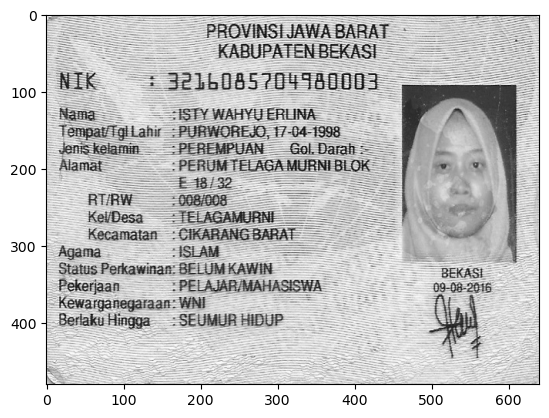

In [19]:
img=cv2.imread("ktp isty 1.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [20]:
th,thresh=cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)


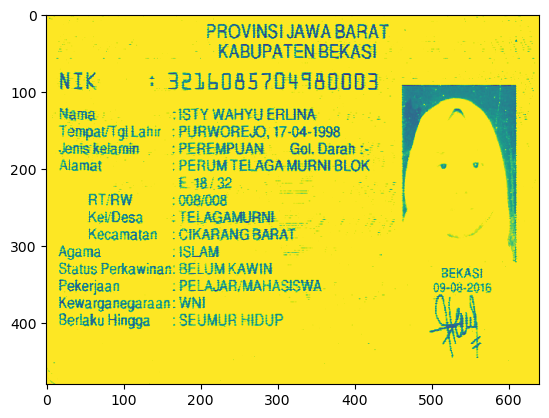

In [21]:
plt.imshow(thresh)

In [22]:
pytesseract.image_to_string(thresh, lang='ind')

'PROVINSI JAWA BARAT\n\nKABUPATEN BEKASI\nNIK : 3215085705980093\nNama “1STY WAHYU ERLINA\n\nmpatTgiLani - PURWOREJO, 17-04-1998\nJenis kelarin :PEREMPUAN — Gol. Darah -\n\nAlamat PERUM TELAGA MURNI BLOK\n£ 1832\nRTRW : 008008\nKeiDesa — : TELAGAMURNI\nKecamatan . CIKARANG BARAT\nAgama iSI .\nStatus Perkawinan.\nPekerjaan : PELAJAR/MAHASISWA\n\nKewarganeyaraan WNI\nBerlaku Hingga — SEUMUR HIDUP\n\nBEKASI\n\n09-0:\n\nn\n\n916\n'

In [23]:
for word in pytesseract.image_to_string(thresh, lang='ind').split("\n"):
    print(word)

PROVINSI JAWA BARAT

KABUPATEN BEKASI
NIK : 3215085705980093
Nama “1STY WAHYU ERLINA

mpatTgiLani - PURWOREJO, 17-04-1998
Jenis kelarin :PEREMPUAN — Gol. Darah -

Alamat PERUM TELAGA MURNI BLOK
£ 1832
RTRW : 008008
KeiDesa — : TELAGAMURNI
Kecamatan . CIKARANG BARAT
Agama iSI .
Status Perkawinan.
Pekerjaan : PELAJAR/MAHASISWA

Kewarganeyaraan WNI
Berlaku Hingga — SEUMUR HIDUP

BEKASI

09-0:

n

916

